# 0. Load Packages & CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import plotly.graph_objects as go

from src.utils import save_image

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

warnings.filterwarnings('ignore')

In [2]:
# 데이터 로드 
df = pd.read_csv('data/FAF5.7.1_2018-2024_half.csv')

# US Census Bureau 인구 데이터(외부 데이터, 24년도 인구 값만 사용할 예정)
us_pop = pd.read_csv('data/NST-EST2024-ALLDATA.csv')

# 1. Data PreProcessing

In [3]:
df.head()

,fr_orig,dms_orig,dms_dest,fr_dest,fr_inmode,dms_mode,fr_outmode,sctg2,trade_type,dist_band,...,current_value_2022,current_value_2023,current_value_2024,tmiles_2018,tmiles_2019,tmiles_2020,tmiles_2021,tmiles_2022,tmiles_2023,tmiles_2024
0,NaN,11,11,NaN,NaN,1,NaN,1,1,1,...,101.069223,104.272629,115.502844,3.218410,3.351765,3.375547,3.482383,3.502040,3.469055,3.474500
1,NaN,11,19,NaN,NaN,1,NaN,1,1,2,...,764.053625,788.270430,873.167561,48.631191,50.646235,51.005589,52.619906,52.916934,52.418516,52.500796
2,NaN,11,129,NaN,NaN,1,NaN,1,1,3,...,2.695525,2.780960,3.080471,0.450066,0.468714,0.472040,0.486980,0.489729,0.485116,0.485878
3,NaN,11,131,NaN,NaN,1,NaN,1,1,2,...,24.746343,25.530683,28.280351,2.177036,2.267241,2.283328,2.355595,2.368892,2.346580,2.350263
4,NaN,11,139,NaN,NaN,1,NaN,1,1,2,...,10.173100,10.495538,11.625913,1.274964,1.327792,1.337213,1.379536,1.387323,1.374256,1.376413


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2475280 entries, 0 to 2475279
Data columns (total 38 columns):
 #   Column              Dtype  
---  ------              -----  
 0   fr_orig             float64
 1   dms_orig            int64  
 2   dms_dest            int64  
 3   fr_dest             float64
 4   fr_inmode           float64
 5   dms_mode            int64  
 6   fr_outmode          float64
 7   sctg2               int64  
 8   trade_type          int64  
 9   dist_band           int64  
 10  tons_2018           float64
 11  tons_2019           float64
 12  tons_2020           float64
 13  tons_2021           float64
 14  tons_2022           float64
 15  tons_2023           float64
 16  tons_2024           float64
 17  value_2018          float64
 18  value_2019          float64
 19  value_2020          float64
 20  value_2021          float64
 21  value_2022          float64
 22  value_2023          float64
 23  value_2024          float64
 24  current_value_2018  float64
 25  cu

In [5]:
df.shape

(2475280, 38)

In [6]:
# 수치형 데이터에 대해서만 describe
df.describe()[[f'tons_{year}' for year in range(2018,2025)]]

,tons_2018,tons_2019,tons_2020,tons_2021,tons_2022,tons_2023,tons_2024
count,2.475280e+06,2.475280e+06,2.475280e+06,2.475280e+06,2.475280e+06,2.475280e+06,2.475280e+06
mean,8.099339e+00,8.040162e+00,7.670783e+00,7.889689e+00,7.945939e+00,8.025167e+00,8.021467e+00
std,2.926983e+02,2.934276e+02,2.799997e+02,2.932597e+02,2.944923e+02,3.002377e+02,3.022853e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.023000e-03,9.570000e-04,7.960000e-04,9.110000e-04,9.260000e-04,7.830000e-04,8.300000e-04
75%,3.772025e-02,3.579400e-02,3.437700e-02,3.802300e-02,3.913300e-02,3.527000e-02,3.592400e-02
max,1.271726e+05,1.314887e+05,1.162072e+05,1.292715e+05,1.257007e+05,1.284089e+05,1.337911e+05


In [7]:
df.describe()[[f'value_{year}' for year in range(2018,2025)]]

,value_2018,value_2019,value_2020,value_2021,value_2022,value_2023,value_2024
count,2.475280e+06,2.475280e+06,2.475280e+06,2.475280e+06,2.475280e+06,2.475280e+06,2.475280e+06
mean,7.722158e+00,7.611501e+00,7.244735e+00,7.421420e+00,7.509725e+00,7.500152e+00,7.612008e+00
std,1.444738e+02,1.428500e+02,1.360546e+02,1.394963e+02,1.430438e+02,1.435784e+02,1.463953e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.327000e-03,9.293000e-03,7.994000e-03,8.613000e-03,9.185000e-03,8.108000e-03,8.474000e-03
75%,3.156905e-01,3.118267e-01,2.899470e-01,3.139643e-01,3.259855e-01,2.990905e-01,3.063422e-01
max,6.132861e+04,6.024371e+04,5.294640e+04,5.561941e+04,5.841958e+04,5.938698e+04,5.973034e+04


In [8]:
df.describe()[[f'current_value_{year}' for year in range(2018,2025)]]

,current_value_2018,current_value_2019,current_value_2020,current_value_2021,current_value_2022,current_value_2023,current_value_2024
count,2.475280e+06,2.475280e+06,2.475280e+06,2.475280e+06,2.475280e+06,2.475280e+06,2.475280e+06
mean,8.077167e+00,7.910421e+00,7.335652e+00,8.692631e+00,1.029827e+01,9.901379e+00,1.000811e+01
std,1.552424e+02,1.500815e+02,1.346532e+02,1.670913e+02,2.175578e+02,1.975396e+02,1.956177e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.649000e-03,9.633000e-03,8.256000e-03,1.005400e-02,1.209100e-02,1.062900e-02,1.122500e-02
75%,3.262603e-01,3.229722e-01,2.990913e-01,3.655293e-01,4.264425e-01,3.907972e-01,4.048582e-01
max,6.200335e+04,6.138074e+04,5.398548e+04,5.875078e+04,8.061345e+04,6.869186e+04,6.980130e+04


In [9]:
df.describe()[[f'tmiles_{year}' for year in range(2018,2025)]]

,tmiles_2018,tmiles_2019,tmiles_2020,tmiles_2021,tmiles_2022,tmiles_2023,tmiles_2024
count,2.475280e+06,2.475280e+06,2.475280e+06,2.475280e+06,2.475280e+06,2.475280e+06,2.475280e+06
mean,2.219956e+00,2.190686e+00,2.069303e+00,2.120990e+00,2.145329e+00,2.167207e+00,2.157392e+00
std,8.686466e+01,8.689159e+01,8.004015e+01,8.333232e+01,8.654050e+01,9.034140e+01,8.682791e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.150000e-04,6.780000e-04,5.580000e-04,6.490000e-04,6.680000e-04,5.590000e-04,5.960000e-04
75%,3.129925e-02,2.987400e-02,2.875100e-02,3.164225e-02,3.301500e-02,2.955400e-02,3.015900e-02
max,6.009636e+04,6.380695e+04,6.193205e+04,6.706271e+04,7.382236e+04,8.118886e+04,7.951259e+04


수치형 변수 모두 하위 25%의 값이 0으로 기록되어 있어, 0 값에 대한 해석을 진행해야 함.

In [10]:
na_col = df.isna().sum().reset_index().rename(columns = {0:'missing_cnt'})
na_col[na_col['missing_cnt'] > 0]

,index,missing_cnt
0,fr_orig,1469102
3,fr_dest,1524891
4,fr_inmode,1469102
6,fr_outmode,1524891


missing의 경우 해외와 관련된 수치에만 결측이 존재하고, fr_orig와 fr_inmode와 같이 결측치의 값이 같은 것으로 보아, 데이터가 국내-수입-수출로 구분될 가능성이 있음.

### 1.1 0값에 대한 해석

In [11]:
# 1. 연도 목록 추출
years = [2018, 2019, 2020, 2021, 2022, 2023, 2024]

# 2. 고정 컬럼
id_cols = [
    "dms_orig", "dms_dest",
    "fr_orig", "fr_dest",
    "dms_mode", "fr_inmode", "fr_outmode",
    "sctg2",
    "trade_type",
    "dist_band"
]

# 3. long 포맷용 데이터 생성
dfs = []

for y in years:
    temp = df[id_cols].copy()
    temp["year"] = y
    temp["tons"] = df[f"tons_{y}"]
    temp["value"] = df.get(f"value_{y}")
    temp["current_value"] = df.get(f"current_value_{y}")
    temp["tmiles"] = df.get(f"tmiles_{y}")
    dfs.append(temp)

df_long = pd.concat(dfs, ignore_index=True)
print(df_long.shape)

(17326960, 15)


In [12]:
tons_0 = df_long.loc[(df_long['tons'] == 0),['tons','value','current_value','tmiles']].apply(sum)
print(tons_0)

tons_0_df = df_long.loc[(df_long['tons'] == 0)]
len(tons_0_df)

tons              0.000000
value            30.759039
current_value    35.249362
tmiles            0.001731
dtype: float64


5580580

In [13]:
tons_0_df['dist_band'].value_counts()

dist_band
8    1115830
6     985003
3     791891
4     736781
5     707630
7     637250
2     427987
1     178208
Name: count, dtype: int64

In [14]:
# 항공 / 트럭 / 기차 / 배 / 소포
tons_0_df['dms_mode'].value_counts()

dms_mode
4    2260427
1    1205077
2    1029447
5     863147
3     123996
7      93791
6       4382
8        313
Name: count, dtype: int64

In [15]:
# ton이 0인 데이터는 모두 해외(수입/수출) 데이터로 구성
print(tons_0_df['fr_orig'].notna().sum() + tons_0_df['fr_dest'].notna().sum())
print(len(tons_0_df))

5580580
5580580


동일하게, 항공인 경우가 대부분 -> ton이 0인 데이터들의 구성이 주로 해외 데이터로 구성되어있다고 추측

In [16]:
value_0 = df_long.loc[(df_long['value'] == 0),['tons','value','current_value','tmiles']].apply(sum)
print(value_0)

value_0_df = df_long.loc[(df_long['value'] == 0)]
value_0_df.head()

tons             287922.006766
value                 0.000000
current_value         0.000000
tmiles            45904.267380
dtype: float64


,dms_orig,dms_dest,fr_orig,fr_dest,dms_mode,fr_inmode,fr_outmode,sctg2,trade_type,dist_band,year,tons,value,current_value,tmiles
489039,19,61,NaN,NaN,1,NaN,NaN,41,1,8,2018,0.000571,0.0,0.0,0.001178
489041,19,182,NaN,NaN,1,NaN,NaN,41,1,4,2018,0.441184,0.0,0.0,0.234156
489058,19,472,NaN,NaN,1,NaN,NaN,41,1,2,2018,0.678083,0.0,0.0,0.143038
489062,20,20,NaN,NaN,3,NaN,NaN,41,1,4,2018,6.641458,0.0,0.0,3.353718
489065,20,531,NaN,NaN,3,NaN,NaN,41,1,5,2018,60.498798,0.0,0.0,52.843274


In [17]:
# 해외 데이터 길이 / 전체 데이터 길이 (99.97% 가량 해외 데이터)
print( (value_0_df['fr_orig'].notna().sum() + value_0_df['fr_dest'].notna().sum()) / len(value_0_df) )

0.9997991035714363


- ton, value, current_value가 0이라고 해서, 다른 수치들이 0이 되진 않는다.

데이터의 단위를 보았을 때, 백만 달러/천 톤 이하인 값들은 모두 0으로 기록되는 것으로 예상

또한, 데이터의 특성상 대부분 집계 함수(sum)을 활용해 분석을 진행할 예정이었기에, 분석에 큰 차질이 없다고 판단

-> 다만, 추후 나올 수출 전략 분석 시 zero division error가 발생할 경우 2차 전처리를 할 수 있다고 염두에 두고 분석을 진행

추가로, 주 분석이 주류 데이터에 대한 분석이었으므로 주류 데이터에 대해서도 비슷한 흐름인지 확인하기 위해 산점도로 시각화를 진행

In [18]:
dms_df = df.loc[df['trade_type'] == 1]
fr_import = df.loc[df['fr_orig'].notna(),]
fr_export = df.loc[df['fr_dest'].notna(),]

dms_alcohol = dms_df[dms_df['sctg2'] == 8]
import_alcohol = fr_import[fr_import['sctg2'] == 8]
export_alcohol = fr_export[fr_export['sctg2'] == 8]

In [19]:
def scatter_plot(y, x_limit=None, y_limit=None):
    tons_col = f'tons_{y}'
    value_col = f'value_{y}'

    plt.figure(figsize=(12, 8))

    # 산점도 그리기 (각 그룹별로 색상과 라벨 지정)
    plt.scatter(dms_alcohol[tons_col], dms_alcohol[value_col], color='blue', alpha=0.4, label='Domestic (1)', s=10)
    plt.scatter(import_alcohol[tons_col], import_alcohol[value_col], color='green', alpha=0.4, label='Import (2)', s=10)
    plt.scatter(export_alcohol[tons_col], export_alcohol[value_col], color='red', alpha=0.4, label='Export (3)', s=10)

    # 축 범위 설정
    if x_limit:
        plt.xlim(0, x_limit)
    if y_limit:
        plt.ylim(0, y_limit)

    # 그래프 꾸미기
    plt.title(f'Tons vs Value by Trade Type ({y})', fontsize=15)
    plt.xlabel('Tons (Kilotons)', fontsize=12)
    plt.ylabel('Value (Million $)', fontsize=12)
    plt.legend() # 범례 표시
    plt.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

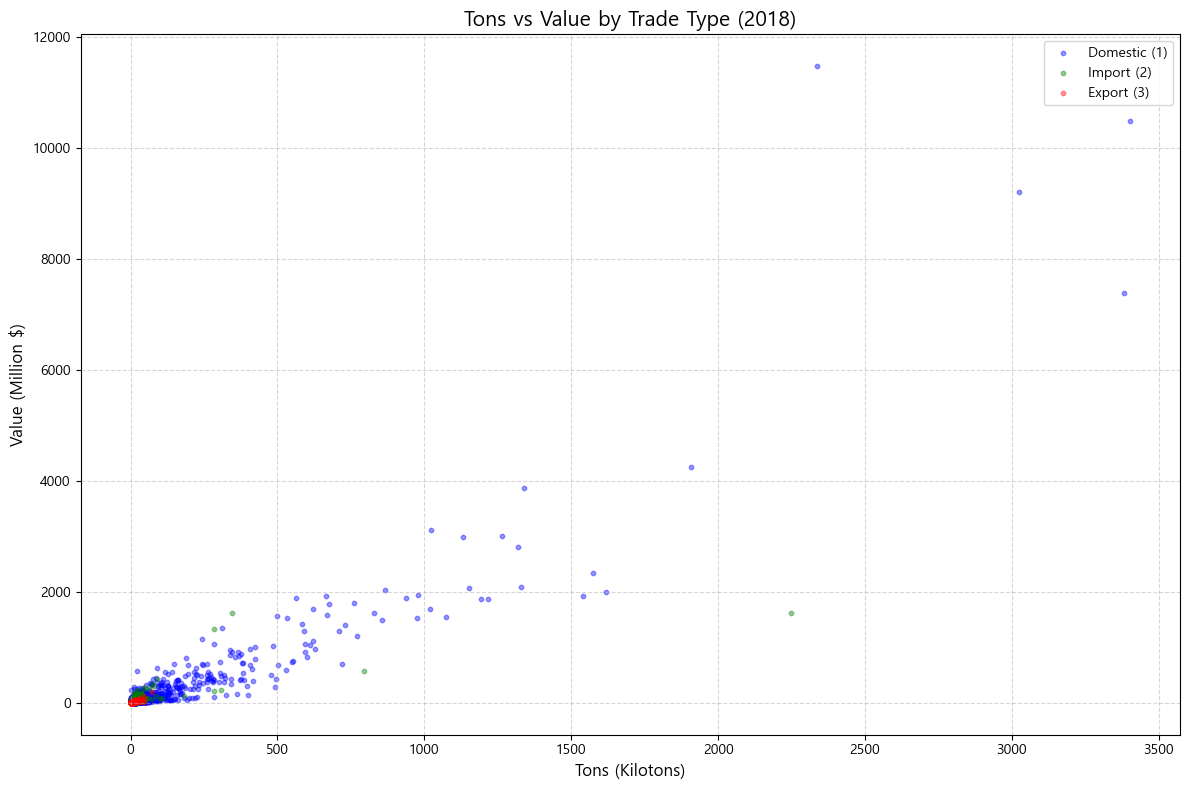

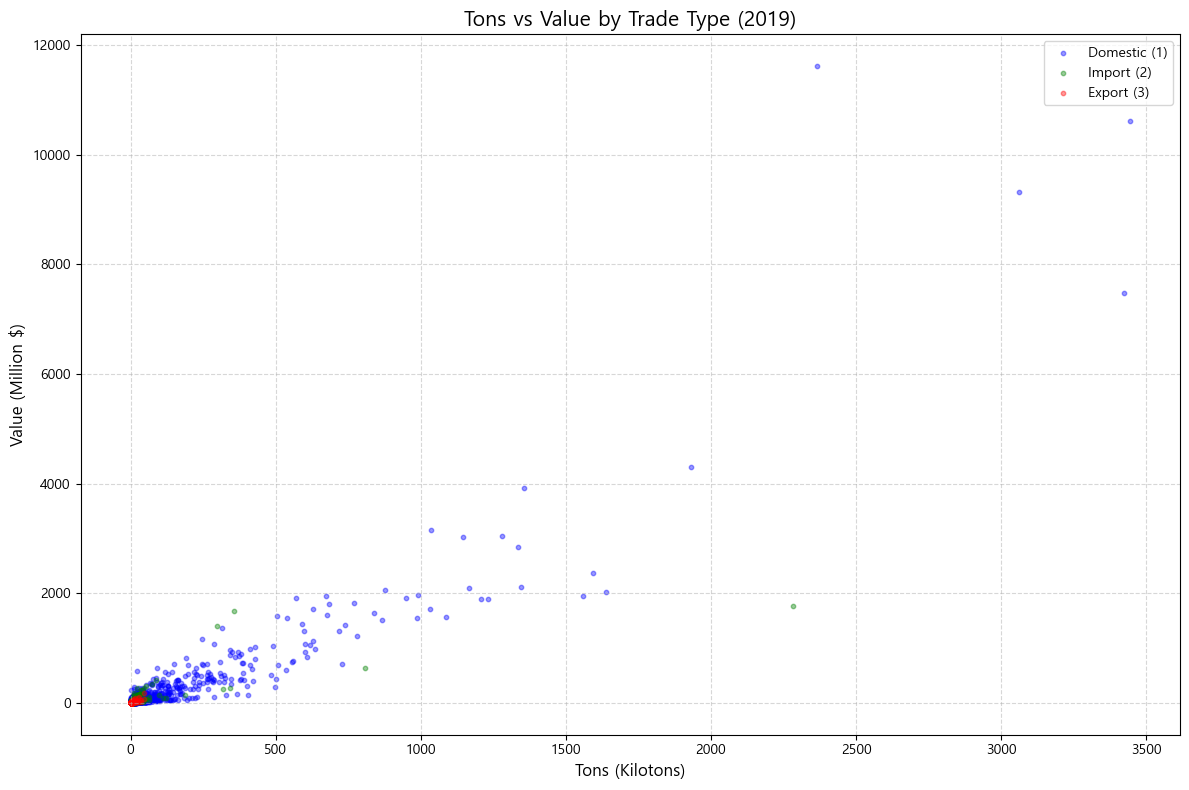

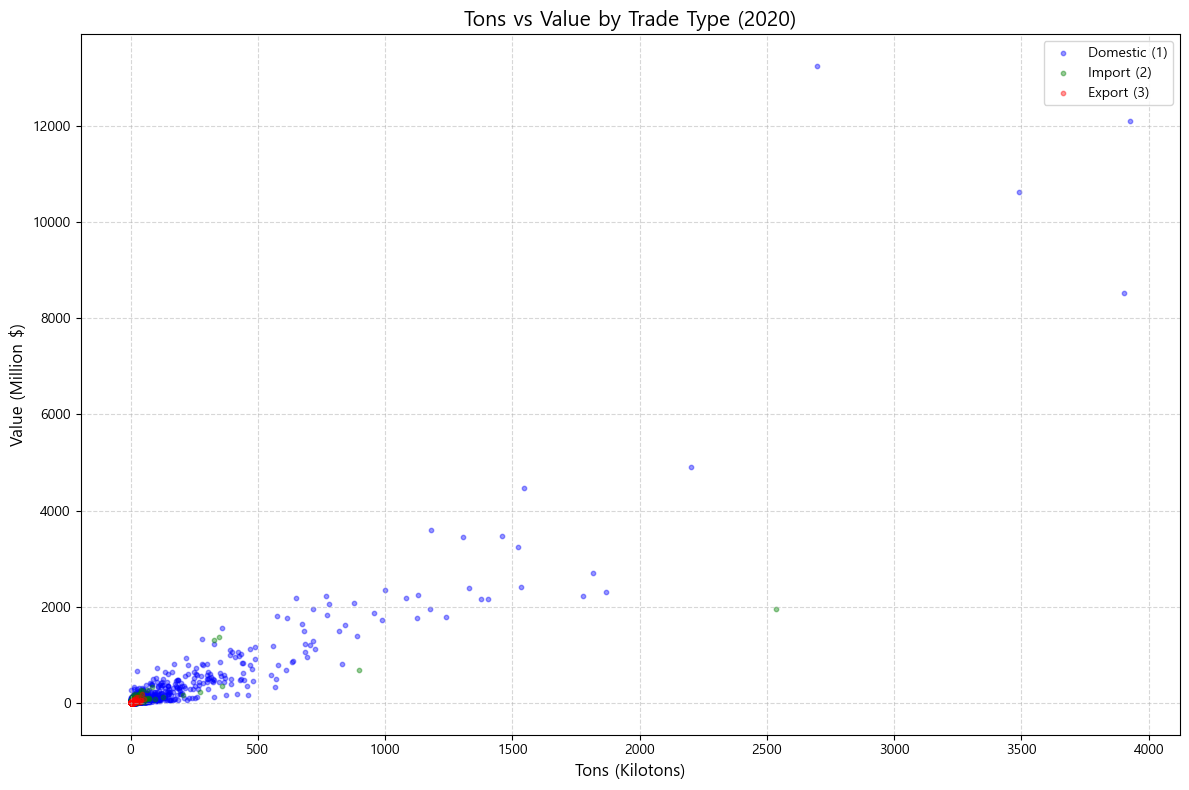

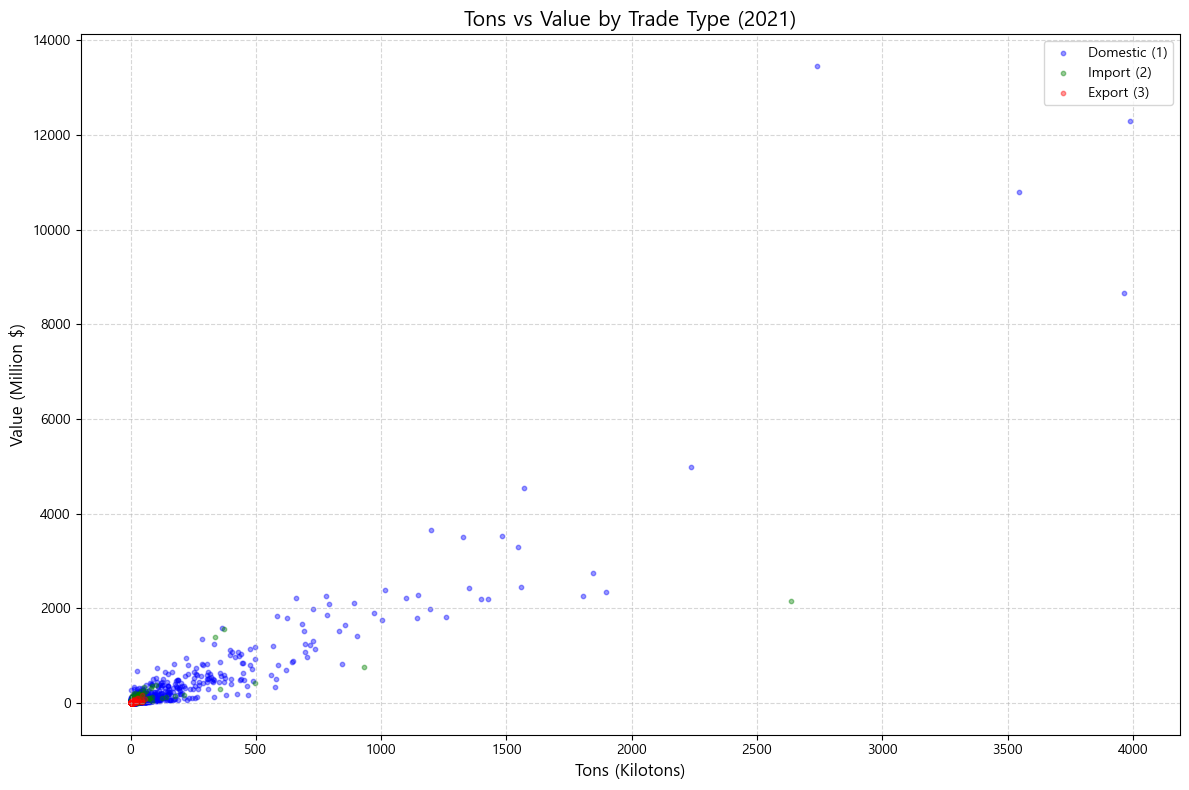

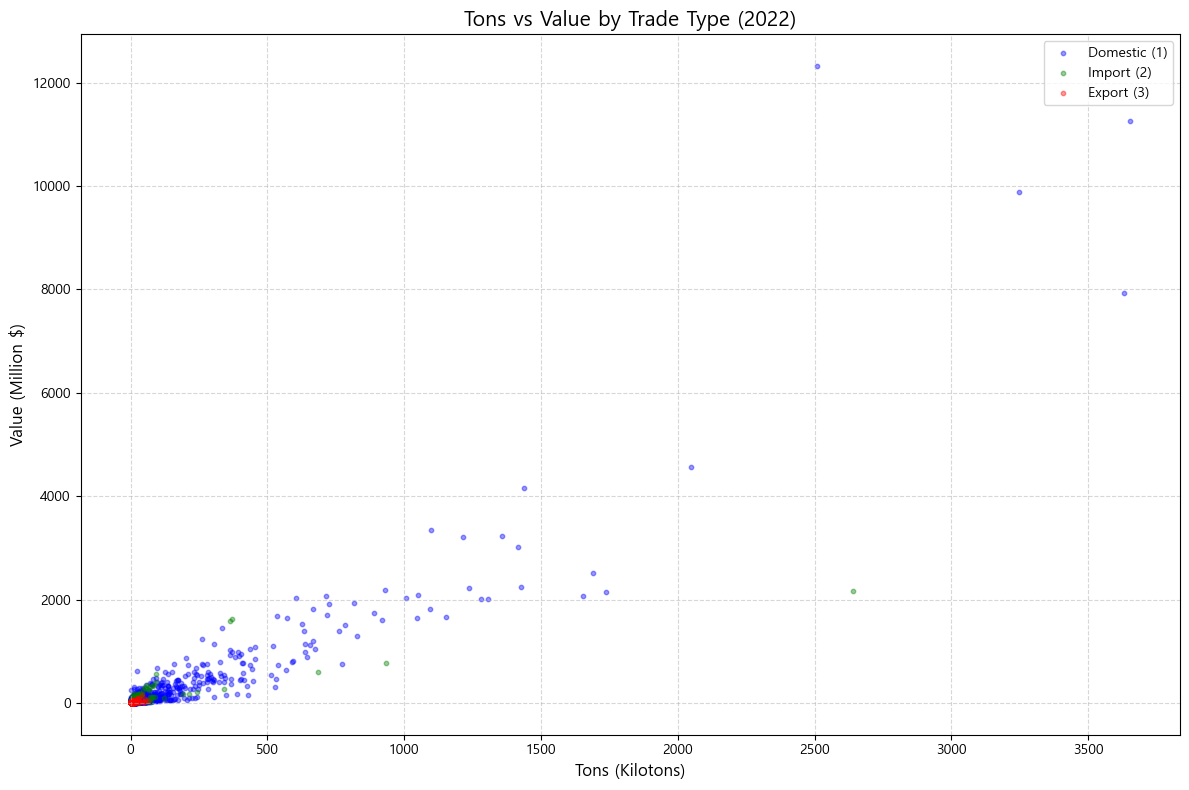

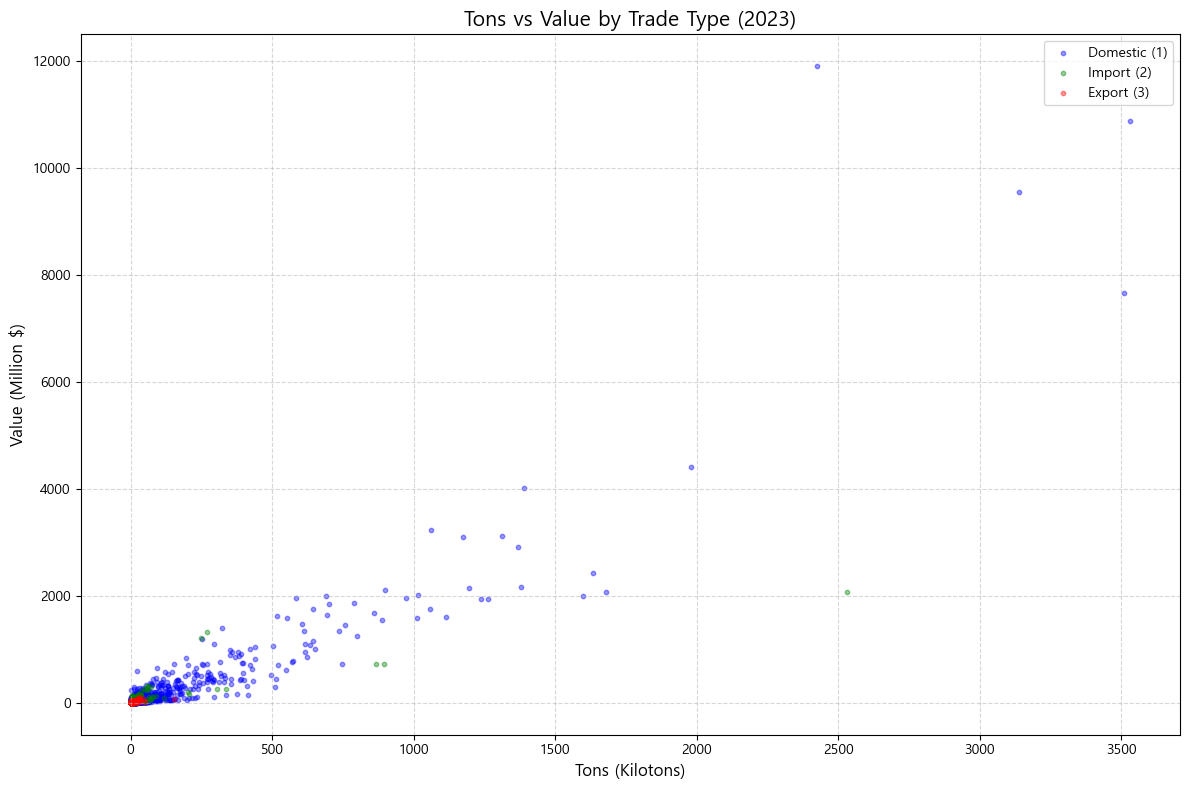

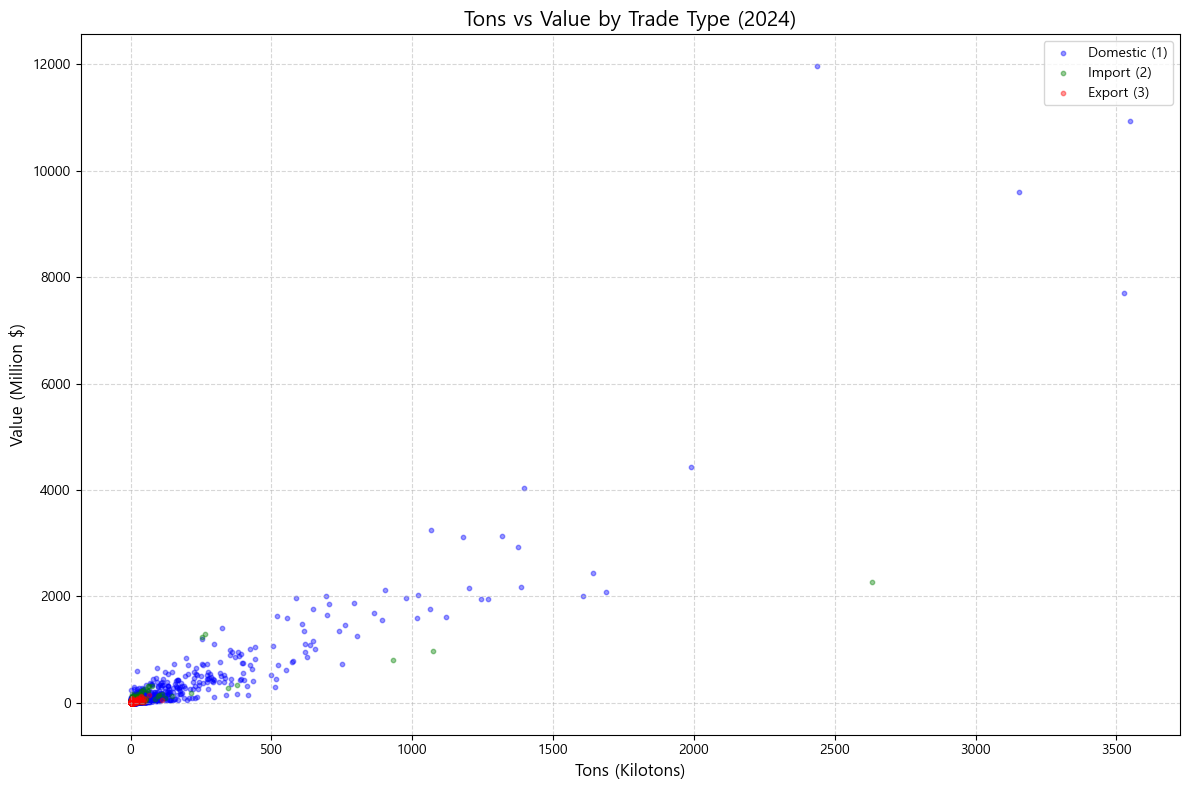

In [20]:
for year in range(2018, 2025):
    scatter_plot(year)

1. 앞선 경우와 비슷하게, 주로 해외 관련 데이터에 0이 주로 기록되어 있다.

2. 큰 값을 이상치로 제거하거나 capping 하기에는 row 하나가 6년치의 정보를 담고 있었기에, 6년 동안 값의 변동이 크지 않다면 그대로 활용

In [21]:
df_alcohol = df[df['sctg2'] == 8]
df_alcohol[(df_alcohol['value_2024'] >= 6000) | (df_alcohol['tons_2024'] >= 2500)]

,fr_orig,dms_orig,dms_dest,fr_dest,fr_inmode,dms_mode,fr_outmode,sctg2,trade_type,dist_band,...,current_value_2022,current_value_2023,current_value_2024,tmiles_2018,tmiles_2019,tmiles_2020,tmiles_2021,tmiles_2022,tmiles_2023,tmiles_2024
49108,NaN,61,61,NaN,NaN,1,NaN,8,1,1,...,12149.659155,12151.405488,12316.271809,69.811372,70.657639,80.557590,81.840473,74.937280,72.431708,72.800921
49380,NaN,64,64,NaN,NaN,1,NaN,8,1,1,...,10660.176145,10661.708387,10806.362982,108.714897,110.032760,125.449620,127.447411,116.697302,112.795458,113.370421
50519,NaN,171,171,NaN,NaN,1,NaN,8,1,1,...,8565.642751,8566.873935,8683.106497,67.513582,68.331994,77.906095,79.146753,72.470774,70.047671,70.404732
52121,NaN,363,363,NaN,NaN,1,NaN,8,1,1,...,13296.758422,13298.669633,13479.101662,36.964737,37.412830,42.654800,43.334079,39.678877,38.352190,38.547686
644568,802.0,489,171,NaN,2.0,2,NaN,8,2,6,...,2338.805918,2314.291027,2550.381551,2989.966441,3033.988547,3371.473665,3505.438319,3511.505434,3365.318741,3501.502864


18 ~ 24년에 높은 값들 보였던 값들이 모두 같은 허브에서 운송한 정보였다.

따라서, 공장에서 생산하는 양이 급격하게 줄거나 늘었다고 보기 힘든 데이터였으므로, 정상적인 데이터로 판단하고 별도의 처리 없이 분석을 진행하였다.

### 1.2 fr_import, fr_export 데이터 확인

앞서 국내/수입/수출로서 데이터가 분리될 수도 있다는 것을 확인했기에, 데이터의 row로 먼저 확인

In [22]:
dms_df = df.loc[df['trade_type'] == 1]
fr_import = df.loc[df['fr_orig'].notna(),]
fr_export = df.loc[df['fr_dest'].notna(),]

# 국내 운송 51만건, 해외 수입 100만건, 해외 수출 95만건
print('미국 국내 운송 건수:', dms_df.shape)
print('미국 해외 수입 건수:', fr_import.shape)
print('미국 해외 수출 건수:', fr_export.shape)

print(len(dms_df) + len(fr_import) + len(fr_export))
print(len(df))

미국 국내 운송 건수: (518713, 38)
미국 해외 수입 건수: (1006178, 38)
미국 해외 수출 건수: (950389, 38)
2475280
2475280


국내 + 수입 + 수출 = 전체

1. missing 값은 국내의 경우 fr과 관련된 값이 NA

2. 수입의 경우 수출 관련 칼럼이 NA

3. 수출의 경우 수입 관련 칼럼이 NA

-> 즉, 데이터의 결측값은 존재하지 않는다.

### 1.3 운송수단 pipeline 제거

- 주류의 운송수단에 pipeline(dms_mode == 6)이 존재하는데, pipeline은 주로 석탄, 천연가스를 운반 시 사용하기에 논리에 맞지 않는 값이라고 판단해 제거하였다.

In [23]:
# 알콜 
df_alcohol = df[df['sctg2'] == 8] 

df_alcohol.loc[df_alcohol['dms_mode'] == 6,'dms_mode'].value_counts()

dms_mode
6    9
Name: count, dtype: int64

In [24]:
idx = df[(df['sctg2'] == 8) & (df['dms_mode'] == 6)].index
df.drop(idx, inplace = True)

### 1.4 기존 데이터 국내 / 수입 / 수출로 분리 및 EDA를 위한 메타 데이터 결합

메타 데이터 결합을 통해 라벨을 그에 맞는 이름으로 변환해 시각화에 용이하게끔 새롭게 칼럼을 생성

In [25]:
# 메타 데이터 병합
file_str = 'data/FAF5_metadata.xlsx'
mode = pd.read_excel(file_str, sheet_name="Mode").rename(
    columns={"Numeric Label":"code","Description":"mode_name"})
trade = pd.read_excel(file_str, sheet_name="Trade Type").rename(
    columns={"Numeric Label":"code","Description":"trade_type_nm"})
dist = pd.read_excel(file_str, sheet_name="Distance Band").rename(
    columns={"Numeric Label":"code","Description":"dist_band_nm"})
sctg = pd.read_excel(file_str, sheet_name="Commodity (SCTG2)").rename(
    columns={"Numeric Label":"code","Description":"sctg2_name"})
state = pd.read_excel(file_str, sheet_name="State").rename(
    columns={"Numeric Label":"code","Description":"state_name"})
domestic = pd.read_excel(file_str, sheet_name="FAF Zone (Domestic)").rename(
    columns={"Numeric Label":"code","Short Description":"dms_name"})
foreign = pd.read_excel(file_str, sheet_name="FAF Zone (Foreign)").rename(
    columns={"Numeric Label":"code","Description":"fr_name"})

In [26]:
# 운송 모드 변환 (dms_mode, fr_inmode, fr_outmode)
df = df.merge(mode[["code","mode_name"]].rename(columns = {'mode_name':'dms_mode_nm'}), 
        left_on="dms_mode", right_on="code", how="left").drop(columns="code")
df = df.merge(mode[["code","mode_name"]].rename(columns = {'mode_name':'fr_inmode_nm'}), 
        left_on="fr_inmode", right_on="code", how="left").drop(columns="code")
df = df.merge(mode[["code","mode_name"]].rename(columns = {'mode_name':'fr_outmode_nm'}), 
        left_on="fr_outmode", right_on="code", how="left").drop(columns="code")

# trade 변환
df = df.merge(trade[["code","trade_type_nm"]], 
        left_on="trade_type", right_on="code", how="left").drop(columns="code")

# dist 변환
df = df.merge(dist[["code","dist_band_nm"]], 
        left_on="dist_band", right_on="code", how="left").drop(columns="code")

# sctg 변환
# (요기만 name으로 처리)
df = df.merge(sctg[["code","sctg2_name"]], 
        left_on="sctg2", right_on="code", how="left").drop(columns="code")

# dms_orig, dms_dest 변환
df = df.merge(domestic[["code","dms_name"]].rename(columns = {'dms_name':'dms_orig_nm'}), 
        left_on="dms_orig", right_on="code", how="left").drop(columns="code")
df = df.merge(domestic[["code","dms_name"]].rename(columns = {'dms_name':'dms_dest_nm'}), 
        left_on="dms_dest", right_on="code", how="left").drop(columns="code")

# dms_orig, dest를 주 단위(state)로 변환
df['state_orig'] = list(map(int, df['dms_orig'] / 10))
df['state_dest'] = list(map(int, df['dms_dest'] / 10))
df = df.merge(state[["code","state_name"]].rename(columns = {'state_name':'state_orig_nm'}), 
        left_on="state_orig", right_on="code", how="left").drop(columns="code")
df = df.merge(state[["code","state_name"]].rename(columns = {'state_name':'state_dest_nm'}), 
        left_on="state_dest", right_on="code", how="left").drop(columns="code")

# fr_orig, fr_dest 변환
df = df.merge(foreign[["code","fr_name"]].rename(columns = {'fr_name':'fr_orig_nm'}), 
        left_on="fr_orig", right_on="code", how="left").drop(columns="code")
df = df.merge(foreign[["code","fr_name"]].rename(columns = {'fr_name':'fr_dest_nm'}), 
        left_on="fr_dest", right_on="code", how="left").drop(columns="code")

In [27]:
# 메타데이터와 결합한 데이터 저장
df.to_csv('data/FAF5_join_meta.csv', index = False)

# 2. 공장 설립 EDA

In [28]:
df = pd.read_csv('data/FAF5_join_meta.csv')

In [29]:
# 메모리 절약을 위해 object -> category 변환
for col in df.select_dtypes('object').columns:
    df[col] = df[col].astype('category')

In [30]:
# 전체 데이터 국내/수입/수출로 분리
dms_df = df.loc[df['trade_type'] == 1]
fr_import = df.loc[df['fr_orig'].notna(),]
fr_export = df.loc[df['fr_dest'].notna(),]

# 필요없는 칼럼(칼럼 전체가 NA인 값) 제거
dms_df = dms_df.dropna(axis = 1, how = 'all')
fr_import = fr_import.dropna(axis = 1, how = 'all')
fr_export = fr_export.dropna(axis = 1, how = 'all')

# 주류 데이터만 따로 추출
df_alcohol = df[df['sctg2'] == 8]
dms_alcohol = dms_df[dms_df['sctg2'] == 8]
import_alcohol = fr_import[fr_import['sctg2'] == 8]
export_alcohol = fr_export[fr_export['sctg2'] == 8]

# 필요 없는 칼럼(칼럼 전체가 NA인 값) 제거
dms_alcohol = dms_alcohol.dropna(axis = 1, how = 'all')
import_alcohol = import_alcohol.dropna(axis = 1, how = 'all')
export_alcohol = export_alcohol.dropna(axis = 1, how = 'all')

In [31]:
# 국내 운송 51만건, 해외 수입 100만건, 해외 수출 95만건
print('미국 국내 운송 건수:', dms_df.shape)
print('미국 해외 수입 건수:', fr_import.shape)
print('미국 해외 수출 건수:', fr_export.shape)

# 주류 국내 5442건, 해외 수입 14731건, 해외 수출 12064건
print('미국 주류 국내 운송 건수:', dms_alcohol.shape)
print('미국 주류 해외 수입 건수:', import_alcohol.shape)
print('미국 주류 해외 수출 건수:', export_alcohol.shape)

미국 국내 운송 건수: (518713, 44)
미국 해외 수입 건수: (1006178, 48)
미국 해외 수출 건수: (950380, 48)
미국 주류 국내 운송 건수: (5442, 44)
미국 주류 해외 수입 건수: (14731, 48)
미국 주류 해외 수출 건수: (12055, 48)


### 2.1 주류 공장 설립 분석

- 주류 공장 설립시 고려 사항

1. 원료(주로 곡식, 양주의 경우 과일, 채소)

2. 소비시장이 큰 곳(tons_dest) + 생산(orig) 대비 공급(dest)이 높다면, 공장 설립 시 해당 지역에 공급에 유리

3. 물(맥주의 경우 주로 물이 많이 사용) -> 도메인 지식 활용

-> 1,2,3에 대한 분석 진행

### 2.1.1 곡식/기타농산물 시각화

Successfully saved: images/미국 주요 곡물 생산지.png


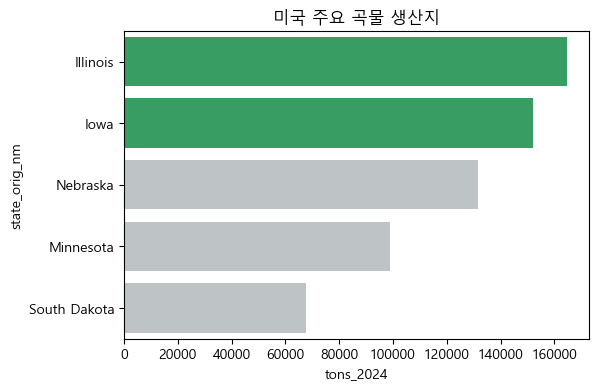

In [32]:
# 주요 곡물 생산지
df_grain = dms_df[dms_df['sctg2'] == 2]
grain_group = df_grain.groupby(['state_orig_nm'])['tons_2024'].sum().reset_index().sort_values(by = 'tons_2024', ascending = False).head(5)

ordered_states = grain_group['state_orig_nm'].tolist()

if grain_group['state_orig_nm'].dtype.name == 'category':
    grain_group['state_orig_nm'] = grain_group['state_orig_nm'].cat.remove_unused_categories()

fig = plt.figure(figsize = (6,4))

colors = ['#27AE60'] * 2 + ['#BDC3C7'] * 3

sns.barplot(data = grain_group,
            x = 'tons_2024',
            y = 'state_orig_nm',
            order = ordered_states,
            palette = colors)

plt.title('미국 주요 곡물 생산지')

save_image(fig, '미국 주요 곡물 생산지')

Successfully saved: images/미국 기타 농산물 생산지.png


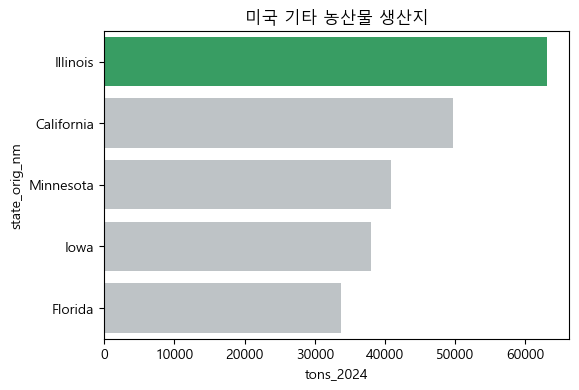

In [33]:
# 기타 농산물
df_other_prods = dms_df[dms_df['sctg2'] == 3]
other_group = df_other_prods.groupby(['state_orig_nm'])['tons_2024'].sum().reset_index()\
    .sort_values(by = 'tons_2024', ascending = False).head(5)

ordered_states = other_group['state_orig_nm'].tolist()

if other_group['state_orig_nm'].dtype.name == 'category':
    other_group['state_orig_nm'] = other_group['state_orig_nm'].cat.remove_unused_categories()

fig = plt.figure(figsize = (6,4))

colors = ['#27AE60'] * 1 + ['#BDC3C7'] * 4

sns.barplot(data = other_group,
            x = 'tons_2024',
            y = 'state_orig_nm',
            order = ordered_states,
            palette = colors)

plt.title('미국 기타 농산물 생산지')

save_image(fig, '미국 기타 농산물 생산지')

### 2.2 소비시장이 큰 곳(tons_dest) + 생산(orig) 대비 공급(dest)이 높다면, 공장 설립 시 해당 지역에 공급에 유리

Successfully saved: images/미국 주류 주요 도착지.png


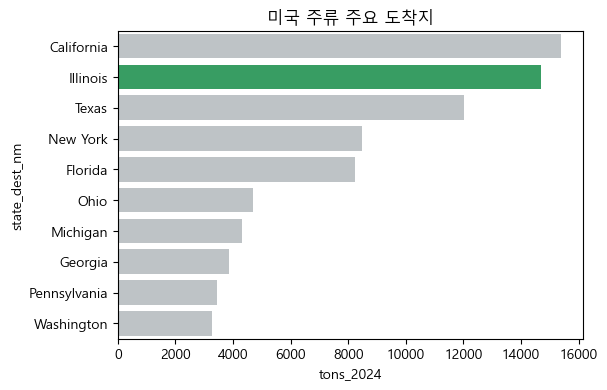

In [34]:
# 기타 농산물
alcohol_tons_group = df_alcohol.groupby(['state_dest_nm'])['tons_2024'].sum().reset_index()\
    .sort_values(by = 'tons_2024', ascending = False).head(10)

group_cat = alcohol_tons_group['state_dest_nm'].tolist()

if alcohol_tons_group['state_dest_nm'].dtype.name == 'category':
    alcohol_tons_group['state_dest_nm'] = alcohol_tons_group['state_dest_nm'].cat.remove_unused_categories()

fig = plt.figure(figsize = (6,4))

colors = ['#BDC3C7'] * 1 + ['#27AE60'] * 1 + ['#BDC3C7'] * 8

sns.barplot(data = alcohol_tons_group,
            x = 'tons_2024',
            y = 'state_dest_nm',
            order = group_cat,
            palette = colors
            )

plt.title('미국 주류 주요 도착지')

save_image(fig, '미국 주류 주요 도착지')

In [35]:
alc_orig = df_alcohol.groupby(['state_orig','state_orig_nm'], observed = True)[['tons_2024']].sum().sort_values(by = 'tons_2024', ascending = False).\
    reset_index().rename(columns = {'state_orig_nm':'state_nm','state_orig':'state'})
alc_dest = df_alcohol.groupby(['state_dest','state_dest_nm'], observed = True)[['tons_2024']].sum().sort_values(by = 'tons_2024', ascending = False).\
    reset_index().rename(columns = {'state_dest_nm':'state_nm','state_dest':'state'})

alc_merge = alc_orig.merge(alc_dest, on = ['state_nm','state']).rename(columns = {'tons_2024_x':'tons_orig', 'tons_2024_y':'tons_dest'})
alc_merge['net_outflow'] = alc_merge['tons_dest'] - alc_merge['tons_orig']
alc_merge.sort_values(by = 'net_outflow', ascending = False).head(10)

,state,state_nm,tons_orig,tons_dest,net_outflow
4,17,Illinois,6910.676064,14677.664133,7766.988069
15,42,Pennsylvania,2189.391542,3433.160672,1243.769130
12,26,Michigan,3309.573613,4320.468673,1010.895060
18,37,North Carolina,1935.503855,2881.336964,945.833109
26,45,South Carolina,1221.701338,2161.389919,939.688581
20,27,Minnesota,1755.577282,2657.588349,902.011067
25,22,Louisiana,1322.622183,2211.206674,888.584491
21,25,Massachusetts,1685.237970,2428.434277,743.196307
22,47,Tennessee,1605.071732,2306.093762,701.022030
2,36,New York,7806.516193,8490.179190,683.662997


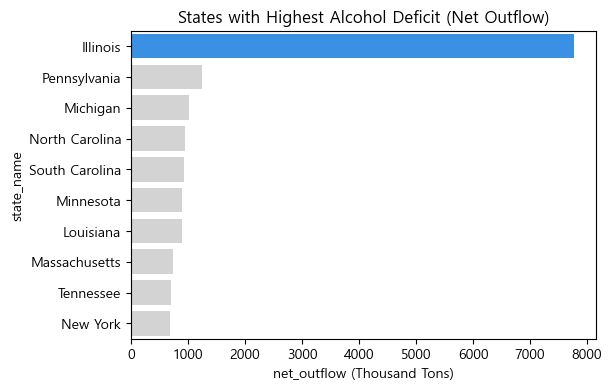

Successfully saved: images/net outflow of top10.png


In [36]:
top10_outflow = alc_merge.sort_values(by='net_outflow', ascending=False).head(10)

fig = plt.figure(figsize = (6,4))

colors = ['dodgerblue'] + ['lightgray'] * (len(top10_outflow) - 1)

sns.barplot(data = top10_outflow, x = 'net_outflow', y = 'state_nm', order = top10_outflow['state_nm'], palette = colors)
plt.title('States with Highest Alcohol Deficit (Net Outflow)')
plt.xlabel('net_outflow (Thousand Tons)')
plt.ylabel('state_name')
plt.show()

save_image(fig, 'net outflow of top10')

In [37]:
state_to_code = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'District of Columbia': 'DC'
}

alc_merge['net_outflow_minus'] = -1 * alc_merge['net_outflow']
alc_merge['state_code'] = alc_merge['state_nm'].map(state_to_code)

In [38]:
fig = px.choropleth(
    data_frame = alc_merge,
    locations = 'state_code',
    locationmode = 'USA-states',
    color = 'net_outflow_minus',          # 색상 기준 (소비량 - 생산량)
    hover_name = 'state_nm',        # 마우스 올렸을 때 뜨는 이름
    hover_data = ['tons_orig', 'tons_dest', 'net_outflow'], # 상세 수치
    color_continuous_scale = 'RdBu', # Red(부족) - Blue(과잉) 색상 판
    range_color = [-5000, 5000],    # 데이터 범위에 맞춰 조정 (필요시)
    scope = 'usa',                  # 미국 지도만 보기
    title = '미국 주별 주류 수급 현황 (Net Outflow: 소비 - 생산)'
)

target_states = ['IL','IA']
label_df = alc_merge[alc_merge['state_code'].isin(target_states)]

fig.update_layout(
    title = {'text':'미국 주별 주류 수급 현황', 'font' : {'size':24}},
    title_x = 0.5,
    margin = {"r":0,"t":50,"l":0,"b":0}
)
fig.add_scattergeo(
    locations = label_df['state_code'],
    locationmode = 'USA-states',
    text = label_df['state_code'],
    mode = 'text',
    textfont = {'color':'blue'},
)

fig.show()

save_image(fig, '미국 주별 주류 수급 현황')

Successfully saved: images/미국 주별 주류 수급 현황.png


1. Illinois는 주로 곡식, 기타 농산물(과일)에 대한 주 생산지이고, 만약 물량이 부족해질 경우 Iowa에서 자재 수급이 가능하다.

2. Illinois는 생산 대비 공급의 비중이 높은 곳이고, 5번째로 주류 공급을 많이 받는 지역이다.

-> 공장을 Illinois에 설치한다면, 자재를 쉽게 확보할 수 있고 Illinois에서 생산한 주류의 공급에 유리하다.

### 3 어떤 도시로 주로 배송할 것인가 + 어떤 주류를 주로 보낼 것인가? EDA

<Axes: xlabel='dms_mode_nm', ylabel='tons_2024'>

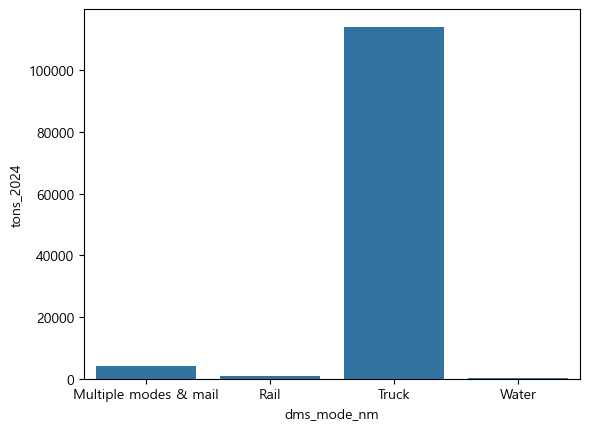

In [39]:
truck_grouped = dms_alcohol.groupby(['dms_mode_nm'], observed = True)['tons_2024'].sum().reset_index()

truck_grouped_common = truck_grouped[truck_grouped['tons_2024'] > 100]

if truck_grouped_common['dms_mode_nm'].dtype.name == 'category':
    truck_grouped_common['dms_mode_nm'] = truck_grouped_common['dms_mode_nm'].cat.remove_unused_categories()

sns.barplot(truck_grouped_common[truck_grouped_common['tons_2024'] > 100], x = 'dms_mode_nm', y = 'tons_2024')

- 흐름에 편승해서, truck으로 보내자

#### 어느 도시로 주로 운송할 것인가? -> 중간 허브 지정

- 1. net_outflow -> 큰 음수인 애들 위주로 보자(-500을 기준으로 잡고)

- 2. 미국의 대도시 지역에 하는 것이 안정적으로 돈을 벌 수 있지 않을까(1,000,000 이상 인구)

In [40]:
# minus 500 이하인 값만 추출
alc_merge['net_outflow_minus'] = -1 * alc_merge['net_outflow']
print(alc_merge['net_outflow_minus'].quantile(0.25))
minus_state = alc_merge.loc[alc_merge['net_outflow_minus'] < -500,'state']

-583.3009180000001


In [41]:
us_pop_prob = us_pop[us_pop['STATE'].isin(minus_state)]
us_prob = us_pop_prob[['STATE','NAME','POPESTIMATE2024'] + [f'NPOPCHG_{year}' for year in range(2020,2025)]]
us_prob.head()

,STATE,NAME,POPESTIMATE2024,NPOPCHG_2020,NPOPCHG_2021,NPOPCHG_2022,NPOPCHG_2023,NPOPCHG_2024
14,1,Alabama,5157699,7725,16102,26985,41492,40026
23,12,Florida,23372215,53843,239914,547363,525556,467347
27,17,Illinois,12710158,-22726,-98447,-78820,20438,67899
32,22,Louisiana,4597740,-5573,-24330,-34284,-5616,9669
35,25,Massachusetts,7136171,-38534,5876,21994,44100,69603


In [42]:
# Value / Ton으로 
alc_dest_tmp = df_alcohol.groupby(['state_dest','state_dest_nm'], observed = True)[['current_value_2024','tons_2024']].sum().reset_index()
alc_dest_tmp['c_value_per_ton_2024'] = alc_dest_tmp['current_value_2024'] / alc_dest_tmp['tons_2024']

alc_big_dest = alc_dest_tmp[alc_dest_tmp['state_dest'].isin(minus_state)]
alc_big_dest.sort_values(by = 'c_value_per_ton_2024', ascending = False)

,state_dest,state_dest_nm,current_value_2024,tons_2024,c_value_per_ton_2024
32,36,New York,26650.278558,8490.179190,3.138954
21,25,Massachusetts,6214.312194,2428.434277,2.558979
9,12,Florida,19842.843384,8226.607178,2.412032
47,53,Washington,7165.072042,3273.686523,2.188686
36,40,Oklahoma,2731.770354,1318.360447,2.072097
33,37,North Carolina,5756.502021,2881.336964,1.997858
40,45,South Carolina,4275.919915,2161.389919,1.978320
23,27,Minnesota,5161.049233,2657.588349,1.942005
22,26,Michigan,8354.901044,4320.468673,1.933795
42,47,Tennessee,4087.430331,2306.093762,1.772448


In [43]:
us_pop_prob = us_pop[us_pop['STATE'].isin(minus_state)]
us_prob = us_pop_prob[['STATE','NAME','POPESTIMATE2024'] + [f'NPOPCHG_{year}' for year in range(2020,2025)]]

big_city_prob = us_prob.loc[us_prob['POPESTIMATE2024'] >= 1000000,['STATE','NAME','POPESTIMATE2024']]

tmp_df = big_city_prob.merge(alc_big_dest, left_on = 'STATE', right_on = 'state_dest')

tmp_df[['STATE','NAME','POPESTIMATE2024','c_value_per_ton_2024']].sort_values(by = 'c_value_per_ton_2024', ascending = False)

,STATE,NAME,POPESTIMATE2024,c_value_per_ton_2024
8,36,New York,19867248,3.138954
4,25,Massachusetts,7136171,2.558979
1,12,Florida,23372215,2.412032
14,53,Washington,7958180,2.188686
10,40,Oklahoma,4095393,2.072097
9,37,North Carolina,11046024,1.997858
12,45,South Carolina,5478831,1.978320
6,27,Minnesota,5793151,1.942005
5,26,Michigan,10140459,1.933795
13,47,Tennessee,7227750,1.772448


- 2024년 맥주 kg 당 0.78 ~ 2.29 $

-> 1t 당 780$ ~ 2290$ -> 1000t 당 780000$ ~ 2290000$ -> 백만 달러 / 1000t -> 0.78 ~ 2.29

-> 2.29보다 상위 값은 고급 주종을 취급할 확률이 높다로 해석

In [44]:
alc_big_dest.loc[:, 'state_code'] = alc_big_dest['state_dest_nm'].map(state_to_code)

custom_pink_red = [
    [0.0, '#FFB6C1'],  # 가장 낮은 값 (Light Pink)
    [1.0, '#8B0000']   # 가장 높은 값 (Dark Red)
]

fig = px.choropleth(
    data_frame = alc_big_dest,
    locations = 'state_code',
    locationmode = 'USA-states',
    color = 'c_value_per_ton_2024',          # 색상 기준 (소비량 - 생산량)
    hover_name = 'state_dest_nm',        # 마우스 올렸을 때 뜨는 이름
    hover_data = ['current_value_2024', 'tons_2024', 'c_value_per_ton_2024'], # 상세 수치
    color_continuous_scale = custom_pink_red,
    range_color = [1, 3.5],    # 데이터 범위에 맞춰 조정 (필요시)
    scope = 'usa',                  # 미국 지도만 보기
    title = '미국 주별 주류 가격 대비 톤 현황 (c_value_per_ton_2024 : value / ton)'
)

fig.update_layout(
    title = {'text':'미국 주별 주류 단가(1,000,000$ / 1,000T)', 'font' : {'size':24}},
    title_x = 0.5,
    margin = {"r":0,"t":50,"l":0,"b":0}
)
fig.add_scattergeo(
    locations = alc_big_dest['state_code'],
    locationmode = 'USA-states',
    text = alc_big_dest['state_code'],
    mode = 'text',
    textfont = {'color':'blue'},
)

fig.show()

save_image(fig, '미국 주별 주류 단가')

Successfully saved: images/미국 주별 주류 단가.png


맥주/프리미엄 다연주 배송 전략

1. 자체 생산보다 공급이 높은 주 들을 빈 집이라고 판단. 1분위수보다 약간 더 높은 -500을 기준으로 주 공급 타겟 설정

2. 프리미엄 다연주는 24년의 맥주 값을 참고했을 때, value per ton의 값이 2.29 이상인 주에 프리미엄 다연주를 공급

### 4. 주류 수출 전략 EDA

In [45]:
# 연도 리스트
years = [2018, 2019, 2020, 2021, 2022, 2023, 2024]

## 그래프 y축 범위 동일하게 설정하기 위한 코드
# 수입 데이터 합계
import_tons_max = max([import_alcohol[f'tons_{y}'].sum() for y in years])
import_value_max = max([import_alcohol[f'value_{y}'].sum() for y in years])

# 수출 데이터 합계 (추출 과정은 수입과 동일)
export_tons_max = max([export_alcohol[f'tons_{y}'].sum() for y in years])
export_value_max = max([export_alcohol[f'value_{y}'].sum() for y in years])

# 전체에서의 최댓값 (여유분 10% 추가)
global_tons_max = max(import_tons_max, export_tons_max) * 1.1
global_value_max = max(import_value_max, export_value_max) * 1.1

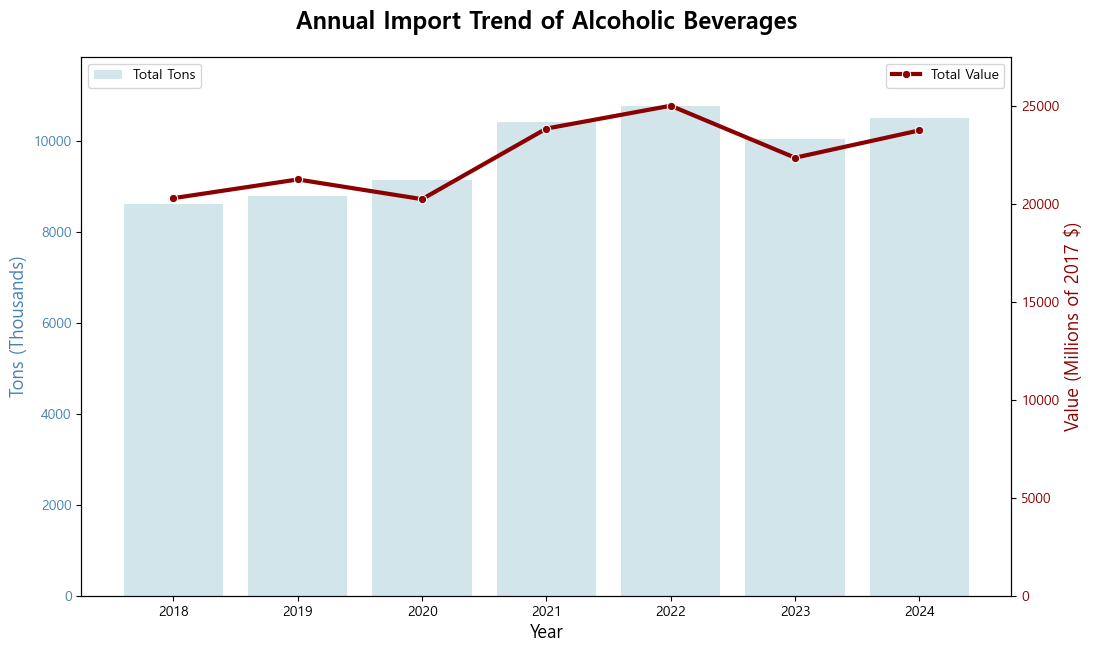

--- 연도별 주류 수입 지표 현황 ---
   Year          Tons         Value  Unit_Price
0  2018   8619.064942  20287.638441    2.353810
1  2019   8782.117885  21241.023751    2.418668
2  2020   9147.580203  20236.368580    2.212210
3  2021  10403.959387  23839.063388    2.291345
4  2022  10772.740303  25004.402908    2.321081
5  2023  10050.378924  22350.337838    2.223830
6  2024  10501.921487  23746.512558    2.261159
Successfully saved: images/주류 수입 트렌드.png


In [47]:
# 수입 지표 합계 계산
tons_alc_im = [import_alcohol[f'tons_{y}'].sum() for y in years]
value_alc_im = [import_alcohol[f'value_{y}'].sum() for y in years]

# 분석 데이터프레임 생성
df_trend_im = pd.DataFrame({
    'Year': years,
    'Tons': tons_alc_im,
    'Value': value_alc_im
})

# 시각화 (이중 축 그래프)
fig, ax1 = plt.subplots(figsize=(12, 7))

# 막대 그래프: 물동량 (Tons)
sns.barplot(x='Year', y='Tons', data=df_trend_im, color='lightblue', alpha=0.6, ax=ax1, label='Total Tons')
ax1.set_ylabel('Tons (Thousands)', fontsize=13, color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.legend(loc='upper left')

# 꺾은선 그래프: 금액 (Value) - 이중 축 사용
ax2 = ax1.twinx()
sns.lineplot(x=range(len(years)), y='Value', data=df_trend_im, marker='o', color='darkred', linewidth=3, ax=ax2, label='Total Value')
ax2.set_ylabel('Value (Millions of 2017 $)', fontsize=13, color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

# ax1 (Tons) 범위 고정
ax1.set_ylim(0, global_tons_max)

# ax2 (Value) 범위 고정
ax2.set_ylim(0, global_value_max)

plt.title('Annual Import Trend of Alcoholic Beverages', fontsize=17, fontweight='bold', pad=20)
ax1.set_xlabel('Year', fontsize=13)
plt.show()

# 수치 결과 출력 (단가 추이 포함)
df_trend_im['Unit_Price'] = df_trend_im['Value'] / df_trend_im['Tons']
print("--- 연도별 주류 수입 지표 현황 ---")
print(df_trend_im[['Year', 'Tons', 'Value', 'Unit_Price']])

save_image(fig, '주류 수입 트렌드')

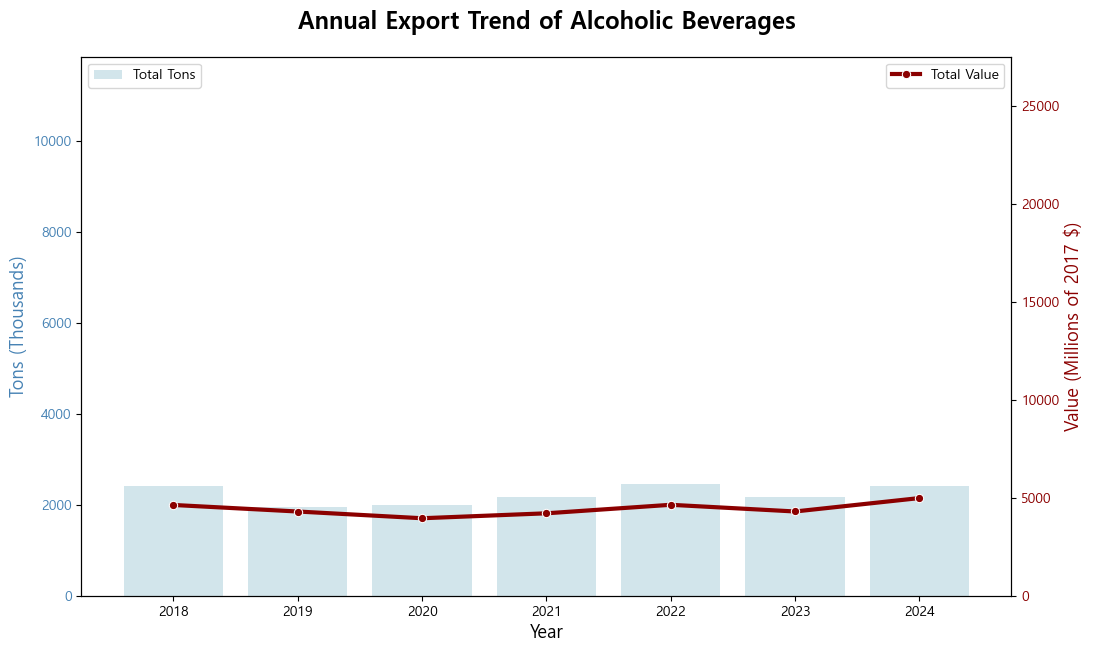

--- 연도별 주류 수출 지표 현황 ---
   Year         Tons        Value  Unit_Price
0  2018  2418.932573  4631.621168    1.914738
1  2019  1948.775866  4297.049392    2.204999
2  2020  1996.046354  3953.526954    1.980679
3  2021  2168.646972  4205.634187    1.939289
4  2022  2466.391943  4640.156399    1.881354
5  2023  2172.171493  4298.707364    1.978991
6  2024  2409.927855  4982.882765    2.067648
Successfully saved: images/주류 수출 트렌드.png


In [48]:
# 수출 지표 합계 계산
tons_alc_ex = [export_alcohol[f'tons_{y}'].sum() for y in years]
value_alc_ex = [export_alcohol[f'value_{y}'].sum() for y in years]

# 분석 데이터프레임 생성
df_trend_ex = pd.DataFrame({
    'Year': years,
    'Tons': tons_alc_ex,
    'Value': value_alc_ex
})

# 시각화 (이중 축 그래프)
fig, ax1 = plt.subplots(figsize=(12, 7))

# 막대 그래프: 물동량 (Tons)
sns.barplot(x='Year', y='Tons', data=df_trend_ex, color='lightblue', alpha=0.6, ax=ax1, label='Total Tons')
ax1.set_ylabel('Tons (Thousands)', fontsize=13, color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.legend(loc='upper left')

# 꺾은선 그래프: 금액 (Value) - 이중 축 사용
ax2 = ax1.twinx()
sns.lineplot(x=range(len(years)), y='Value', data=df_trend_ex, marker='o', color='darkred', linewidth=3, ax=ax2, label='Total Value')
ax2.set_ylabel('Value (Millions of 2017 $)', fontsize=13, color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

# ax1 (Tons) 범위 고정
ax1.set_ylim(0, global_tons_max)

# ax2 (Value) 범위 고정
ax2.set_ylim(0, global_value_max)

plt.title('Annual Export Trend of Alcoholic Beverages', fontsize=17, fontweight='bold', pad=20)
ax1.set_xlabel('Year', fontsize=13)
plt.show()

# 수치 결과 출력 (단가 추이 포함)
df_trend_ex['Unit_Price'] = df_trend_ex['Value'] / df_trend_ex['Tons']
print("--- 연도별 주류 수출 지표 현황 ---")
print(df_trend_ex[['Year', 'Tons', 'Value', 'Unit_Price']])

save_image(fig, '주류 수출 트렌드')

모든 해에서 주류 수입 > 수출

-> 수출이 적으니 경쟁 상대가 비교적 적을 것이다!

### 4.1 연도별 수출 국가 현황

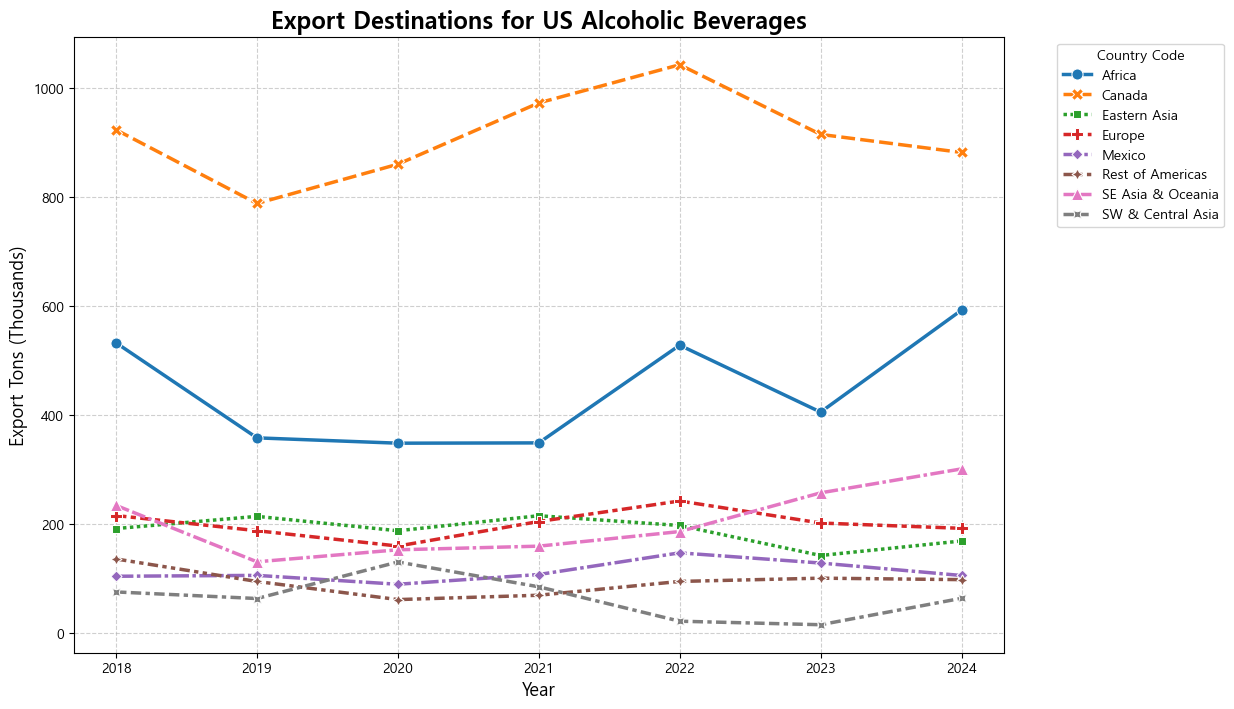

Successfully saved: images/미국 주요 수출국 톤 트렌드.png


In [59]:
## 수출량 그래프

tons_cols = [f'tons_{y}' for y in years]

# 2024년 수출액 순위 기준
top_countries = export_alcohol.groupby('fr_dest_nm')['value_2024'].sum().sort_values(ascending=False).index

# 연도별 데이터 구성
country_trend_t = export_alcohol.groupby('fr_dest_nm')[tons_cols].sum().loc[top_countries].transpose()
country_trend_t.index = years

# 시각화
fig = plt.figure(figsize=(12, 8))
sns.lineplot(data=country_trend_t, markers=True, markersize=8, linewidth=2.5)

plt.title('Export Destinations for US Alcoholic Beverages', fontsize=17, fontweight='bold')
plt.xlabel('Year', fontsize=13)
plt.ylabel('Export Tons (Thousands)', fontsize=13)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Country Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

save_image(fig, '미국 주요 수출국 톤 트렌드')

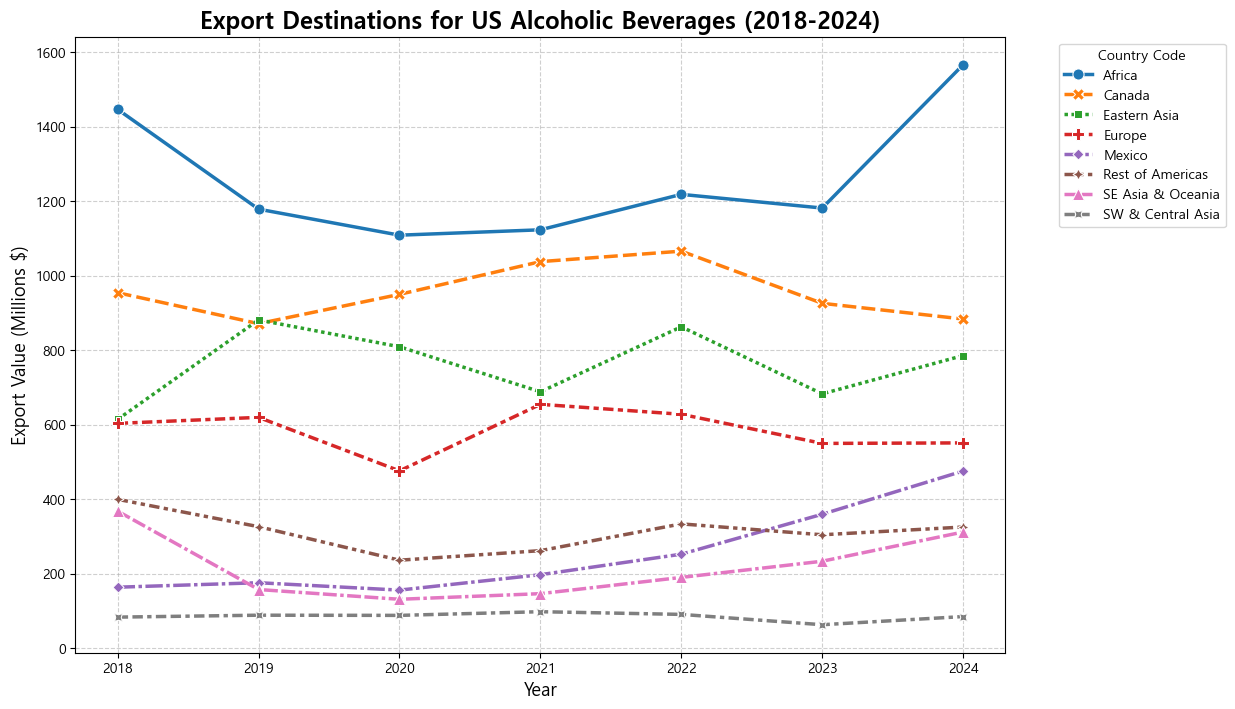

Successfully saved: images/미국 주요 수출국 달러 트렌드.png


In [60]:
## 수출액 그래프

value_cols = [f'value_{y}' for y in years]

# 2024년 수출액 순위 기준
top_countries = export_alcohol.groupby('fr_dest_nm')['value_2024'].sum().sort_values(ascending=False).index

# 연도별 데이터 구성
country_trend = export_alcohol.groupby('fr_dest_nm')[value_cols].sum().loc[top_countries].transpose()
country_trend.index = years

# 시각화
fig = plt.figure(figsize=(12, 8))
sns.lineplot(data=country_trend, markers=True, markersize=8, linewidth=2.5)

plt.title('Export Destinations for US Alcoholic Beverages (2018-2024)', fontsize=17, fontweight='bold')
plt.xlabel('Year', fontsize=13)
plt.ylabel('Export Value (Millions $)', fontsize=13)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Country Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

save_image(fig, '미국 주요 수출국 달러 트렌드')

유럽에서 최근 수출액이 늘었음. 반명 캐나다는 감소하는 추세

주의 깊게 봐야할 점 : 중동&중앙아시아 꾸준히 상승중. 앞으로 투자할 가치가 있을까

### 4.2 고부가가치 국가 찾기 (단가 이용)

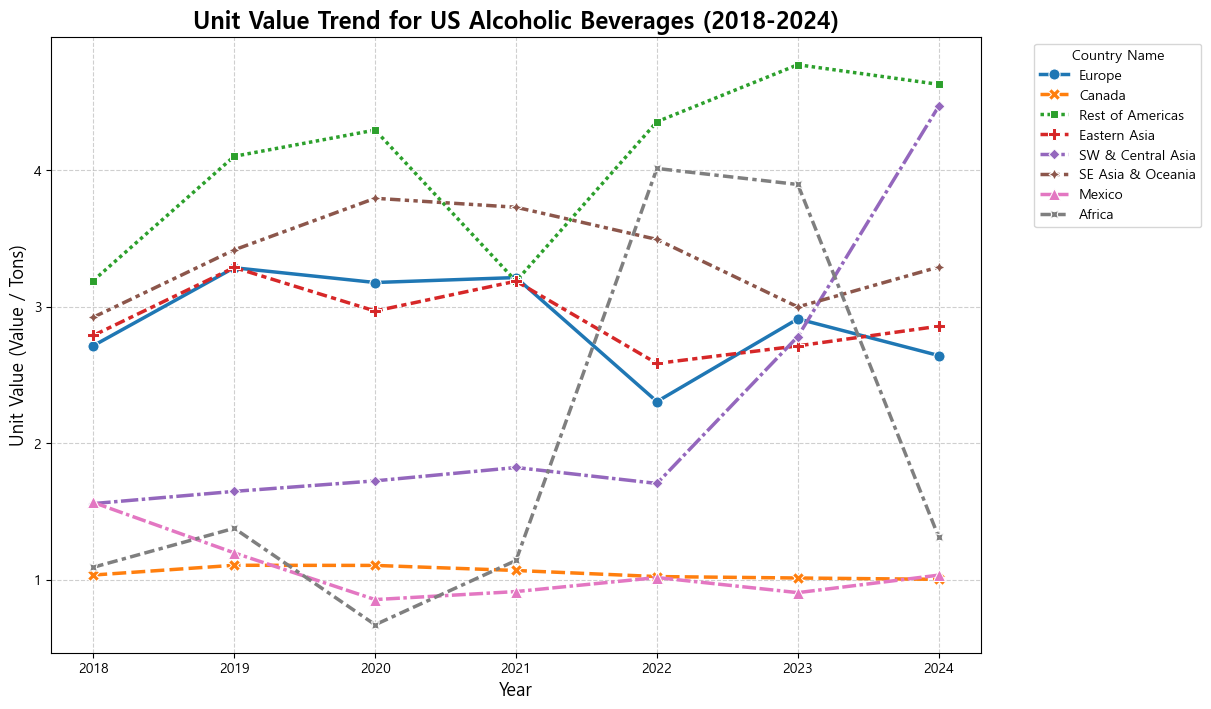

Successfully saved: images/미국 주요 수출국 단가 트렌드.png


In [61]:
# 연도 및 컬럼 설정 
years = [2018, 2019, 2020, 2021, 2022, 2023, 2024]
value_cols = [f'value_{y}' for y in years]
tons_cols = [f'tons_{y}' for y in years]

# 수출액 순위 기준 그대로 가져오기
top_countries = export_alcohol.groupby('fr_dest_nm')['value_2024'].sum().sort_values(ascending=False).index

# 모든 국가의 연도별 단가 계산
# 수출액 그래프와 동일하게 국가별로 그룹화한 뒤, Value와 Tons를 각각 합산
country_value = export_alcohol.groupby('fr_dest_nm')[value_cols].sum()
country_tons = export_alcohol.groupby('fr_dest_nm')[tons_cols].sum()

# 단가(Unit Value) 데이터프레임 생성
unit_value_trend = pd.DataFrame(index=years)

for country in top_countries:
    v = country_value.loc[country].values
    t = country_tons.loc[country].values
    # 0으로 나누기 방지하며 단가 계산
    unit_value_trend[country] = [val / ton if ton > 0 else 0 for val, ton in zip(v, t)]

# 시각화
fig = plt.figure(figsize=(12, 8))

# 데이터프레임 컬럼 순서가 top_countries 순이므로 sns.lineplot이 동일한 색상을 배정합니다.
sns.lineplot(data=unit_value_trend, markers=True, markersize=8, linewidth=2.5)

plt.title('Unit Value Trend for US Alcoholic Beverages (2018-2024)', fontsize=17, fontweight='bold')
plt.xlabel('Year', fontsize=13)
plt.ylabel('Unit Value (Value / Tons)', fontsize=13)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Country Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

save_image(fig, '미국 주요 수출국 단가 트렌드')

중동&중앙아시아! 단가가 매우 올라가고 있음!! -> 고급 주류 투자하기에 적합해보임 = '작지만 돈 되는 시장'  
ai曰 : 중동 지역은 종교적/법적 규제로 인해 전체 물량은 적지만, 소비되는 주류는 대부분 최고급 위스키나 와인인 경우가 많습니다.

### 4.3 주요 이동 경로 파악

출발지와 도착지 쌍 분석하여 가장 물동량이 많은 '핵심 루트'찾기  
state_orig_nm와 fr_dest_nm를 결합한 새로운 'Route' 컬럼을 만들고, 주류의 2024년 tons 합계를 구함

In [52]:
# 1. 경로(Route) 정의: 출발주 -> 해외목적지
export_alcohol['Route'] = export_alcohol['state_orig_nm'].astype(str) + " -> " + export_alcohol['fr_dest_nm'].astype(str)

# 2. 2024년 물동량(Tons) 기준 상위 10개 경로 추출
top_10_routes = export_alcohol.groupby('Route')['tons_2024'].sum().sort_values(ascending=False).head(10)
top_10_routes

Route
California -> Canada          396.256476
Tennessee -> Europe           227.538507
Iowa -> Canada                142.849942
Kentucky -> Europe            129.400047
California -> Europe           86.888363
Texas -> Mexico                68.693301
Kentucky -> Canada             65.634331
California -> Eastern Asia     65.582294
Louisiana -> Europe            65.450064
Missouri -> Mexico             57.607776
Name: tons_2024, dtype: float64

In [53]:
# 중동&중앙아시아 경로만 따로 확인
sw_routes = export_alcohol[export_alcohol['fr_dest_nm'].str.contains('SW')].groupby('Route')['tons_2024'].sum().sort_values(ascending=False)

print("\n--- 중동/중앙아시아 시장 주요 수출 경로 ---")
print(sw_routes.head(10))


--- 중동/중앙아시아 시장 주요 수출 경로 ---
Route
Tennessee -> SW & Central Asia     27.643713
Louisiana -> SW & Central Asia     27.084062
Texas -> SW & Central Asia         22.140188
Florida -> SW & Central Asia        8.232051
Georgia -> SW & Central Asia        7.451764
Kentucky -> SW & Central Asia       3.419156
Indiana -> SW & Central Asia        3.256898
California -> SW & Central Asia     3.065018
Virginia -> SW & Central Asia       2.008156
Wisconsin -> SW & Central Asia      0.587131
Name: tons_2024, dtype: float64


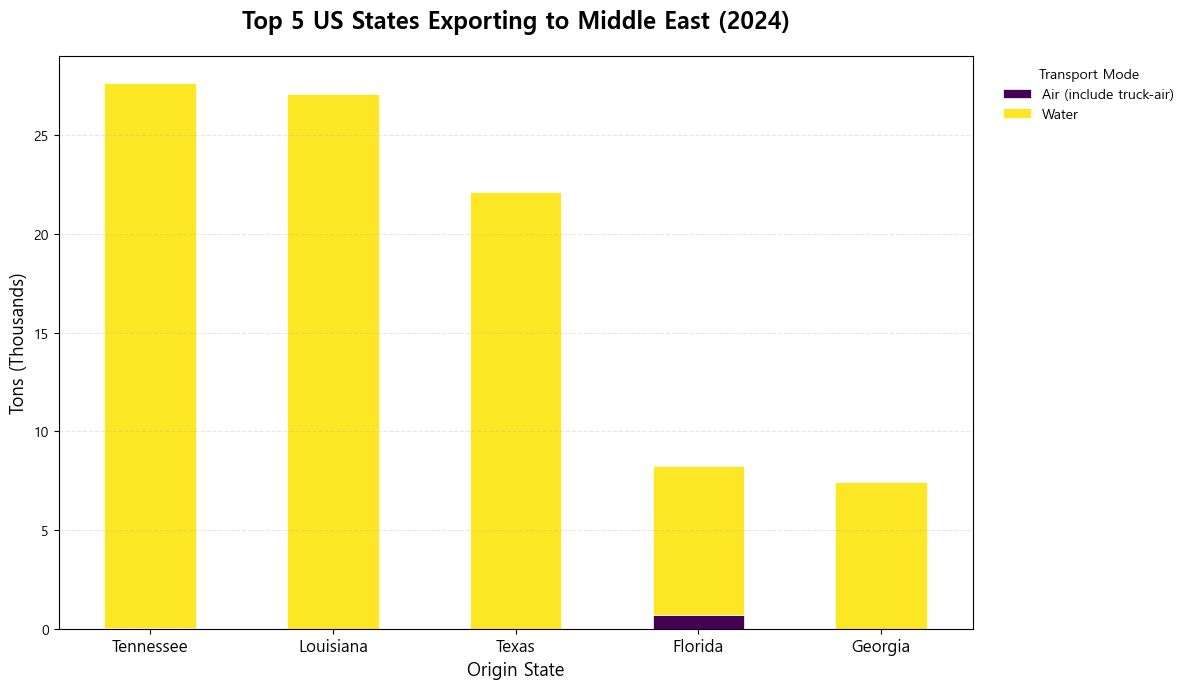

Successfully saved: images/미국 수출 거점 운송수단.png


In [54]:
# 중동/중앙아시아 지역 필터링
sw_data = export_alcohol[export_alcohol['fr_dest_nm'].str.contains('SW', na=False)].copy()

# 출발 주(state_orig_nm)와 운송수단(fr_outmode_nm)별 집계
state_mode_analysis = sw_data.groupby(['state_orig_nm', 'fr_outmode_nm'])['tons_2024'].sum().unstack().fillna(0)

# 물동량 기준 상위 5개 경로 추출
top_5_routes = state_mode_analysis.loc[state_mode_analysis.sum(axis=1).sort_values(ascending=False).head(5).index]

# 시각화
fig, ax = plt.subplots(figsize=(12, 7))

# 누적 막대 그래프
top_5_routes.plot(kind='bar', stacked=True, ax=ax, colormap='viridis', edgecolor='white', linewidth=0.5)

plt.title('Top 5 US States Exporting to Middle East (2024)', fontsize=17, fontweight='bold', pad=20)
plt.ylabel('Tons (Thousands)', fontsize=13)
plt.xlabel('Origin State', fontsize=13)
plt.xticks(rotation=0, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(title='Transport Mode', bbox_to_anchor=(1.02, 1), loc='upper left', frameon=False)
plt.tight_layout()
plt.show()

save_image(fig, '미국 수출 거점 운송수단')

제일 많이 운송하는 테네시, 루이지애나, 텍사스주 모두 공항 있음  
수출량을 늘린다면 항공 운송 방법 추가!

지도 시각화(plotly)

In [55]:
only_plot_df = top_5_routes.copy()
only_plot_df = only_plot_df.reset_index()
only_plot_df['whole_ton'] = only_plot_df.iloc[:,2:].apply(sum, axis = 1)
only_plot_df['state_code'] = only_plot_df['state_orig_nm'].map(state_to_code)
only_plot_df

fr_outmode_nm,state_orig_nm,Air (include truck-air),Water,whole_ton,state_code
0,Tennessee,0.020091,27.623622,27.623622,TN
1,Louisiana,0.000000,27.084062,27.084062,LA
2,Texas,0.000000,22.140188,22.140188,TX
3,Florida,0.704600,7.527451,7.527451,FL
4,Georgia,0.004377,7.447387,7.447387,GA


In [56]:
fig = px.choropleth(
    data_frame = only_plot_df,
    locations = 'state_code',
    locationmode = 'USA-states',
    color = 'whole_ton',   
    hover_name = 'state_orig_nm',        # 마우스 올렸을 때 뜨는 이름
    hover_data = ['whole_ton'], # 상세 수치
    color_continuous_scale = 'Blues',
    range_color = [0, 30],    # 데이터 범위에 맞춰 조정 (필요시)
    scope = 'usa',                  # 미국 지도만 보기
)

fig.update_layout(
    title = {'text':'중동아시아 주요 수출 주(1,000 ton)', 'font' : {'size':24}},
    title_x = 0.5,
    margin = {"r":0,"t":50,"l":0,"b":0},
    showlegend = False,
)
fig.add_scattergeo(
    locations = only_plot_df['state_code'],
    locationmode = 'USA-states',
    text = only_plot_df['state_code'],
    mode = 'text',
    textfont = {'color':'black'},
)

fig.add_trace(go.Choropleth(
    locations = ['IL'],
    z = [1],                  
    locationmode = 'USA-states',
    colorscale = [[0, "#33C553"], [1, "#33C553"]], 
    showscale = False,        
    hoverinfo = 'location+z',
    name = '출발지(IL)'
))

fig.add_scattergeo(
    locations = ['IL'],
    locationmode = 'USA-states',
    text = ['IL'],
    mode = 'text',
    textfont = {'color': 'black', 'size': 14, 'weight': 'bold'}, 
)

fig.show()

save_image(fig, '중동아시아 주요 수출 거점')

Successfully saved: images/중동아시아 주요 수출 거점.png


# 5. 전체 전략 로드맵

공장 거점 + 국내 운송지 전략 + 수출 운송지 전략

In [57]:
# 국내 배송지
domestic_move = alc_big_dest.copy()

domestic_move.sort_values(by = 'c_value_per_ton_2024', ascending = False)

domestic_move['label'] = '맥주 배송지'

domestic_move.loc[domestic_move['state_code'].isin(['NY','MA','FL']),'label'] = '프리미엄 다연주 배송지'

plot_df = domestic_move[['state_code','label']]

tmp = {'state_code':'TN', 'label':'항만 수출 허브'}

plot_df = pd.concat([plot_df,pd.DataFrame([tmp])], ignore_index = True)
plot_df.loc[plot_df['state_code'] == 'IL', 'label'] = '주류 공장'
plot_df.loc[plot_df['state_code'] == 'FL', 'label'] = '프리미엄 다연주 배송지 & 항공 수출 허브'
plot_df = plot_df[plot_df['state_code'] != 'WA']

In [58]:
# 1. 지도 그리기
fig = px.choropleth(
    data_frame = plot_df,
    locations = 'state_code',
    locationmode = 'USA-states',
    color = 'label',              
    hover_name = 'state_code',
    scope = 'usa',
)

# 2. 레이아웃 및 텍스트 추가
fig.update_layout(
    title = {'text': "Beom's Consulting Strategic Roadmap", 'font': {'size': 24}},
    title_x = 0.5,
    legend_title_text = "Label",
    margin = {"r":0,"t":50,"l":0,"b":0}
)

# 주 코드(AL, FL 등)를 지도 위에 표시
fig.add_scattergeo(
    locations = plot_df['state_code'],
    locationmode = 'USA-states',
    text = plot_df['state_code'],
    mode = 'text',
    textfont = {'color': 'black', 'size': 10},
    showlegend = False,
)

fig.show()

save_image(fig, '전략 로드맵')

Successfully saved: images/전략 로드맵.png
